In [6]:
print(9 / 2)
print(9 // 2)

4.5
4


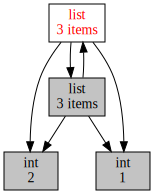

In [2]:
import objgraph

a = [1,2]
b = [1,2]
a.append(b)
b.append(a)

objgraph.show_refs([a])

In [1]:
# == 操作符判断对象之间的值是否相等
a = 1
b = 1
a == b

True

In [2]:
# is 操作符判断对象的身份标识相等，即是否是同一个对象，是否是同一个内存地址
c = 10
d = 10
c is d

True

In [3]:
# c is d = True 仅限于 -5---256范围的数字
cc = -10
dd = -10
cc is dd

False

In [4]:
ccc = 1000
ddd = 1000
ccc is ddd

False

In [5]:
# 深拷贝、浅拷贝
l1 = [1,2,3]
l2 = list(l1)
l2

[1, 2, 3]

In [6]:
l1 == l2

True

In [7]:
l1 is l2

False

In [8]:
import copy
ll1 = [1,2,3]
ll2 = copy.copy(ll1)
ll2

[1, 2, 3]

In [9]:
ll1 == ll2

True

In [10]:
ll1 is ll2

False

In [11]:
# 元组
t1 = (1,2,3)
t2 = tuple(t1)ower
t2

(1, 2, 3)

In [12]:
t1 == t2

True

In [13]:
t1 is t2

True

In [14]:
import copy

x = [1]

x.append(x)

y = copy.deepcopy(x)

x == y

RecursionError: maximum recursion depth exceeded in comparison

In [15]:
def func(message):
    print('Got a message: {}'.format(message))
send_message = func
send_message('hello')

Got a message: hello


In [17]:
def get_message(message):
    return 'Got a message:{}'.format(message)

def root_call(func, message):
    print(func(message))
    
root_call(get_message,'hello')


Got a message:hello


In [18]:
def func(message):
    def get_message(message):
        return 'Got a message:{}'.format(message)
    return get_message(message)

print(func('xxx'))

Got a message:xxx


In [19]:
def my_decorator(func):
    def wrapper():
        print('wrapper of decorator')
        func()
    return wrapper

def greet():
    print('hello')

g = my_decorator(greet)
g()

wrapper of decorator
hello


In [20]:
def my_decorator(func):
    def wrapper():
        print('wrapper of decorator')
        func()
    return wrapper

@my_decorator
def greet():
    print('hello')
    
greet()

wrapper of decorator
hello


In [24]:
def my_decorator(func):
    def wrapper(*args, **kwargs):
        print('wrapper of decorator')
        func(*args, **kwargs)
    return wrapper

@my_decorator
def greet():
    print('hello world')
    
@my_decorator
def greet_msg(message):
    print(message)

In [22]:
greet()

wrapper of decorator
hello world


In [25]:
greet_msg('pppp')

wrapper of decorator
pppp


In [26]:
def repeat(num):
    def my_decorator(func):
        def wrapper(*args, **kwargs):
            for i in range(num):
                print('wrapper of decorator')
                func(*args, **kwargs)
        return wrapper
    return my_decorator

@repeat(3)
def greet():
    print('hello')
greet()

wrapper of decorator
hello
wrapper of decorator
hello
wrapper of decorator
hello


In [30]:

def repeat(num):
    def my_decorator(func):
        import functools
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            for i in range(num):
                print('wrapper of decorator')
                func(*args, **kwargs)
        return wrapper
    return my_decorator

@repeat(3)
def greet():
    print('hello')
    
    
greet.__name__


'greet'

In [32]:
# 类装饰器
class Count():
    def __init__(self, func):
        self.func = func
        self.num_calls = 0
    def __call__(self, *args, **kwargs):
        self.num_calls += 1
        print('num of calls is: {}'.format(self.num_calls))
        return self.func(*args, **kwargs)
    
@Count
def example():
    print('hello')

def main(num):
    for i in range(num):
        example()
main(10)

num of calls is: 1
hello
num of calls is: 2
hello
num of calls is: 3
hello
num of calls is: 4
hello
num of calls is: 5
hello
num of calls is: 6
hello
num of calls is: 7
hello
num of calls is: 8
hello
num of calls is: 9
hello
num of calls is: 10
hello


In [33]:
main(3)

num of calls is: 11
hello
num of calls is: 12
hello
num of calls is: 13
hello


In [35]:
def log_execution_time(func):
    import time
    import functools
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        res = func(*args, **kwargs)
        end = time.perf_counter()
        print('{} took {} ms.'.format(func.__name__, (end - start) * 1000))
        return res
    return wrapper

@log_execution_time
def took_10():
    import time
    time.sleep(3)
    print('success.')
took_10()


success.
took_10 took 3000.4226000000003 ms.


In [42]:
# 缓存
from functools import lru_cache
@lru_cache(maxsize=None)
def demo(num):
    print(num)
    
demo(1)

1


In [51]:
def is_iterable(param):
    try:
        iter(param)
        return True
    except Exception:
        return False

params = [
    123,
    '111',
    [1,2,3,4],
    set([1,1,3,4,5,5]),
    {1:1,2:2, 3:4},
    (1,2,3,4)
]
ms = map(is_iterable,params)
for m in ms:
    print(m)



False
True
True
True
True
True


In [52]:
def is_subsequence(a,b):
    b =iter(b)
    return all(i in b for i in a)

print(is_subsequence([1,3,5],[1,2,3,4,5]))

True


In [53]:
print(is_subsequence([1,4,3],[1,2,3,4,5]))

False


In [1]:
import time

def crawl_page(url):
    sleep_time = int(url.split('_')[-1])
    time.sleep(sleep_time)
    print('ok {}'.format(url))
    return url

def main(urls):
    for url in urls:
        crawl_page(url)

%time main(['url_1','url_2','url_3'])

ok url_1
ok url_2
ok url_3
Wall time: 6.03 s


In [12]:
import asyncio

async def crawl_page(url):
    sleep_time = int(url.split('_')[-1])
    await asyncio.sleep(sleep_time)
    print('ok, {}'.format(url))

async def main(urls):
    for url in urls:
        await crawl_page(url)

# %time asyncio.run(main(['url_1','url_2','url_3']))
# await main(['url_1','url_2','url_3'])
asyncio.run(main(['url_1','url_2','url_3']))

d:\users\intel\appdata\local\programs\python\python37\lib\site-packages\IPython\core\ultratb.py:1383: RuntimeWarning: coroutine 'main' was never awaited
  self.tb = tb


RuntimeError: asyncio.run() cannot be called from a running event loop

In [7]:
async def main():
    print('ok')
    
await main()

ok


In [13]:
import asyncio

async def crawl_page(url):
    sleep_time = int(url.split('_')[-1])
    await asyncio.sleep(sleep_time)
    print('ok, {}'.format(url))
    
async def main(urls):
    tasks = [asyncio.create_task(crawl_page(url)) for url in urls]
    for task in tasks:
        await task

%time asyncio.run(main(['url_1','url_2','url_3']))

RuntimeError: asyncio.run() cannot be called from a running event loop

In [15]:
import asyncio

async def worker_1():
    await asyncio.sleep(1)
    return 1

async def worker_2():
    await asyncio.sleep(2)
    return 2 / 0

async def worker_3():
    await asyncio.sleep(3)
    return 3

async def main():
    task_1 = asyncio.create_task(worker_1())
    task_2 = asyncio.create_task(worker_2())
    task_3 = asyncio.create_task(worker_3())
    
    await asyncio.sleep(2)
    
    res = await asyncio.gather(task_1, task_2, task_3, return_exceptions=True)
    print(res)
    
await main()

[1, ZeroDivisionError('division by zero'), 3]


In [4]:
import asyncio
import random

async def consumer(queue, id):
    while True:
        val = await queue.get()
        print('{} get a val: {}'.format(id, val))
        await asyncio.sleep(1)
        
async def producer(queue, id):
    for i in range(5):
        val = random.randint(1,10)
        await queue.put(val)
        print('{} put a val:{}'.format(id, val))
        await asyncio.sleep(1)
        
async def main():
    
    queue = asyncio.Queue()
    
    consumer_1 = asyncio.create_task(consumer(queue, 'consumer_1'))
    consumer_2 = asyncio.create_task(consumer(queue, 'consumer_2'))
    
    producer_1 = asyncio.create_task(producer(queue, 'producer_1'))
    producer_2 = asyncio.create_task(producer(queue, 'producer_2'))
    
    await asyncio.sleep(10)
    consumer_1.cancel()
    consumer_2.cancel()
    
    await asyncio.gather(consumer_1, consumer_2, producer_1, producer_2, return_exceptions=True)
    
await main()

producer_1 put a val:1
producer_2 put a val:9
consumer_1 get a val: 1
consumer_2 get a val: 9
producer_1 put a val:5
producer_2 put a val:4
consumer_2 get a val: 5
consumer_1 get a val: 4
producer_1 put a val:10
producer_2 put a val:1
consumer_1 get a val: 10
consumer_2 get a val: 1
producer_1 put a val:7
producer_2 put a val:3
consumer_2 get a val: 7
consumer_1 get a val: 3
producer_1 put a val:10
producer_2 put a val:9
consumer_1 get a val: 10
consumer_2 get a val: 9


In [1]:
import asyncio
import aiohttp

from bs4 import BeautifulSoup

async def fetch_content(url):
    async with aiohttp.ClientSession(connector=aiohttp.TCPConnector(ssl=False)
    ) as session:
        async with session.get(url) as response:
            return await response.text()
    
async def main():
    url = "https://movie.douban.com/cinema/later/beijing/"
    init_page = await fetch_content(url)
    init_soup = BeautifulSoup(init_page,'lxml')
    
    movie_names, url_to_fetch, movie_dates = [], [], []
    
    all_movies = init_soup.find('div', id='showing-soon')
    
    for each_movie in all_movies.find_all('div', class_='item'):
        all_a_tag = each_movie.find_all('a')
        all_li_tag = each_movie.find_all('li')
        
        movie_names.append(all_a_tag[1].text)
        url_to_fetch.append(all_a_tag[1]['href'])
        movie_dates.append(all_li_tag[0].text)
        
    tasks = [fetch_content(url) for url in url_to_fetch]
    pages = await asyncio.gather(*tasks)
    
    for movie_name, movie_date, page in zip(movie_names, movie_dates, pages):
        soup_item = BeautifulSoup(page,'lxml')
        img_tag = soup_item.find('img')
        
        print('{} {} {}'.format(movie_name, movie_date, img_tag['src']))

await main()

护宝计中计 10月22日 https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2569791497.jpg
红色之子·单刀赴会 10月23日 https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2571498420.jpg
步步为营 10月24日 https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2571595076.jpg
天作谜案 10月25日 https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2571445582.jpg
催眠·裁决 10月25日 https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2569044398.jpg
解放·终局营救 10月25日 https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2568486743.jpg
单行道 10月25日 https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2571082611.jpg
太阳升起的时刻 10月25日 https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2571701544.jpg
爱情诅咒 10月25日 https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2571724182.jpg
三傻闹地球 10月26日 https://img9.doubanio.com/view/photo/s_ratio_poster/public/p2569759696.jpg
来者何人 10月30日 https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2534170479.jpg
道具师 10月31日 https://img1.douban

In [9]:
list(map(lambda x: x << 1, range(5)))


[0, 2, 4, 6, 8]

In [10]:
def method(num):
    return num << 1

ls = [method(x) for x in range(5)]
ls

[0, 2, 4, 6, 8]

In [11]:
import time

def cpu_bound(num):
    print(sum(i * i for i in range(num)))

def calculate_sum(nums):
    for num in nums:
        cpu_bound(num)

def main():
    start = time.perf_counter()
    nums = [100 + x for x in range(20)]
    calculate_sum(nums)
    end = time.perf_counter()
    print('time：{}'.format(end - start))
    
main()


328350
338350
348551
358955
369564
380380
391405
402641
414090
425754
437635
449735
462056
474600
487369
500365
513590
527046
540735
554659
time：0.0006903000003148918


In [ ]:
import concurrent.futures
import time

def cpu_bound(num):
    print(sum(x * x for x in range(num)))

def calculate_sum(nums):
    with concurrent.futures.ProcessPoolExecutor() as executors:
        executors.map(cpu_bound, nums)
    
def main():
    start = time.perf_counter()
    nums = [100 + x for x in range(20)]
    calculate_sum(nums)
    end = time.perf_counter()
    print('time：{}'.format(end - start))

main()

In [ ]:
import time
import multiprocessing

def cpu_bound(num):
    print(sum(x * x for x in range(num)))
    
def calculate_sum(nums):
    with multiprocessing.Pool() as pool:
        pool.map(cpu_bound,nums)
        

def main():
    start = time.perf_counter()
    nums = [100 + x for x in range(20)]
    calculate_sum(nums)
    end = time.perf_counter()
    print('time：{}'.format(end - start))
    
if __name__ == '__main__':
    main()

In [ ]:
import time
import multiprocessing

def cpu_bound(num):
    print(sum(x * x for x in range(num)))
    
def calculate_sum(nums):
    with multiprocessing.Pool() as pool:
        pool.map(cpu_bound,nums)
        

def main():
    start = time.perf_counter()
    nums = [100 + x for x in range(20)]
    calculate_sum(nums)
    end = time.perf_counter()
    print('time：{}'.format(end - start))
    
if __name__ == '__main__':
    main()